In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_altered = df_original.copy()

In [3]:
countries = ['Poland', 'Lithuania', 'Latvia', 'Estonia']
df_DA_PLBAL = df_altered[(df_altered['job_country'].isin(countries)) & (df_altered['job_title_short']=='Data Analyst')].copy()
df_DA_PLBAL['job_posted_month_no'] = df_DA_PLBAL['job_posted_date'].dt.month
df_DA_PLBAL_explode = df_DA_PLBAL.explode('job_skills')

In [18]:
df_DA_PLBAL_pivot =df_DA_PLBAL_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_PLBAL_pivot.loc['Total'] = df_DA_PLBAL_pivot.sum()

In [19]:
df_DA_PLBAL_pivot = df_DA_PLBAL_pivot[df_DA_PLBAL_pivot.loc['Total'].sort_values(ascending=False).index]

In [21]:
df_DA_PLBAL_pivot = df_DA_PLBAL_pivot.drop('Total')

In [41]:
df_DA_PLBAL_counted_M = df_DA_PLBAL.groupby('job_posted_month_no').size()

In [46]:
df_DA_PLBAL_prc = df_DA_PLBAL_pivot.div(df_DA_PLBAL_counted_M/100, axis=0)

In [52]:
df_DA_PLBAL_prc = df_DA_PLBAL_prc.reset_index()
df_DA_PLBAL_prc['job_posted_month'] = df_DA_PLBAL_prc['job_posted_month_no'].apply(lambda x: pd.to_datetime(x , format='%m').strftime('%b'))
df_DA_PLBAL_prc = df_DA_PLBAL_prc.set_index('job_posted_month')
df_DA_PLBAL_prc = df_DA_PLBAL_prc.drop(columns='job_posted_month_no')

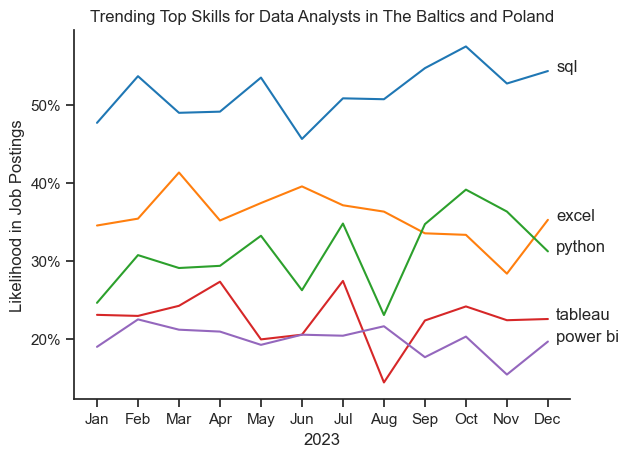

In [89]:
df_plot = df_DA_PLBAL_prc.iloc[:,:5]
sns.set_theme(style='ticks')
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.despine()
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.title('Trending Top Skills for Data Analysts in The Baltics and Poland')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Postings')
plt.legend().remove()
for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])
plt.show()
